In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
pd.options.display.max_columns = 205
import warnings
warnings.filterwarnings("ignore")
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

Commençons par importer le Dataframe résultant du travail de cleaning du notebook précédent 

In [2]:
FinalStatcon = sqlite3.connect('finalstat.sqlite')

In [3]:
FinalStat = pd.read_sql("""SELECT * from FinalStat""", FinalStatcon)

In [4]:
DF = FinalStat.copy()

In [5]:
DF

,level_0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,index,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-2
0,0,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0.0,0.0
1,1,Byron Scott,SG,24,LAL,76,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0.0,0.0
2,2,James Worthy,SF,24,LAL,75,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0.0,0.0
3,3,Jerome Henderson,C,26,LAL,1,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0.0,0.0
4,4,Kareem Abdul-Jabbar,C,38,LAL,79,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,17202,Spencer Hawes,PF,28,MIL,54,1.0,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45,0.0,0.0
17203,17203,Steve Novak,PF,33,MIL,8,0.0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,0.000,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45,0.0,0.0
17204,17204,Terrence Jones,PF,25,MIL,54,12.0,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45,0.0,0.0
17205,17205,Thon Maker,C,19,MIL,57,34.0,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0.0,0.0,0.000,Milwaukee Bucks,7,42,40,0.512,9.0,103.6,103.8,-0.45,0.0,0.0


Intéressons nous aux différentes variables dont nous disposons 

In [6]:
DF.columns

Index(['level_0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'index', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-2'],
      dtype='object')

On peut commencer par retirer les variables artificielles qui se sont rajoutées après une jointure ou export vers une base sql 

In [7]:
DF.drop(columns = ["index","level_0"], inplace = True)

In [8]:
DF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-2'],
      dtype='object')

On cherche pour le moment à prédire le prochain MVP. 

Ainsi, il faut choisir une(des) variable(s) cibles qui nous donneront les informations sur le MVP une fois prédites.

Dans la liste des variables disponibles, la variable "Share" semble la plus pertinente à définir comme variable cible.
En effet, cette dernière donne pour chaque joueur la part des points de votes obtenues pour le MVP.

Comme cette variable Share s'obtient par le calcul Pts Won / Pts Max, on ne peut pas se permettre de garder ces variables pour notre modèle car elles nous donnent directement la réponse

In [9]:
DF.drop(columns = ["Pts Won","Pts Max"], inplace = True)

Pour pouvoir entrainer le modèle, il est nécessaire de travailler uniquement sur des variables numériques. Intéressons nous donc aux variables non numériques

In [10]:
DF.select_dtypes(exclude=np.number).columns

Index(['Player', 'Pos', 'Tm', 'Team'], dtype='object')

On voit ici que 4 variables sont concernées :
- "Player" les noms des joueurs
- "Pos" leur position sur le terrain
- "Team" les nom complets de leurs équipes
- "Tm" l'abréviation de leur équipe

On peut déjà supprimer "Tm" qui donnent exactement les mêmes informations que la variable "Team" elle est donc inutile.
Pour les 3 restantes, on va procédérer à un encodage automatique ( on peut se le permettre car il n'y a pas de relation d'ordre pour ces variables)

In [11]:
DF.drop(columns = ["Tm"], inplace = True) 
labelencoder = LabelEncoder()
DF['Player'] = labelencoder.fit_transform(DF['Player'])
DF['Pos'] = labelencoder.fit_transform(DF['Pos'])
DF['Team'] = labelencoder.fit_transform(DF['Team'])

Vérifions que la transformation a fonctionné 

In [12]:
DF.dtypes

Player       int32
Pos          int32
Age          int64
G            int64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Share      float64
Team         int32
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
MVP_Y-1    float64
MVP_Y-2    float64
dtype: object

## Analyse descriptive

In [16]:
DF.describe()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-2
count,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000
mean,1563.518742,1.980357,26.693729,53.107166,25.893415,20.428297,3.177416,6.987662,0.440215,0.465723,1.347370,0.220430,2.711135,5.639780,0.463293,0.471307,1.581397,2.113512,0.702488,1.030121,2.564020,3.592753,1.903208,0.671860,0.422101,1.253019,1.929994,8.400180,2003.320742,0.006042,17.148486,39.762713,40.279828,0.496638,15.773813,102.089969,102.201773,-0.106758,0.000639,0.000291
std,911.846644,1.424927,4.105179,25.470756,29.377752,10.143385,2.272611,4.704161,0.096145,0.644620,1.702254,0.181822,2.098605,4.128093,0.103285,0.098855,1.433676,1.809255,0.189194,0.863547,1.817427,2.555093,1.877282,0.475604,0.508358,0.822694,0.853350,6.094759,11.255512,0.059300,10.398197,12.820682,12.780116,0.154820,13.074495,7.237652,7.259073,4.529768,0.025277,0.017044
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000,0.000000,0.000000
25%,766.000000,1.000000,24.000000,33.000000,1.000000,12.000000,1.400000,3.300000,0.404000,0.000000,0.000000,0.000000,1.100000,2.500000,0.429000,0.440000,0.600000,0.800000,0.651000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1994.000000,0.000000,8.000000,30.000000,30.000000,0.378000,4.000000,96.700000,96.900000,-3.260000,0.000000,0.000000
50%,1557.000000,2.000000,26.000000,60.000000,11.000000,19.800000,2.600000,5.900000,0.445000,0.100000,0.600000,0.270000,2.100000,4.500000,0.472000,0.481000,1.100000,1.600000,0.747000,0.800000,2.100000,3.000000,1.300000,0.600000,0.300000,1.100000,1.900000,6.900000,2004.000000,0.000000,16.000000,41.000000,40.000000,0.512000,14.000000,101.500000,102.000000,0.070000,0.000000,0.000000
75%,2359.500000,3.000000,29.000000,76.000000,52.000000,28.900000,4.500000,9.800000,0.487000,0.800000,2.200000,0.357000,3.800000,7.900000,0.510000,0.518000,2.200000,2.900000,0.813000,1.400000,3.400000,4.800000,2.600000,0.900000,0.500000,1.700000,2.500000,11.900000,2013.000000,0.000000,27.000000,50.000000,49.000000,0.610000,25.000000,106.900000,107.300000,3.180000,0.000000,0.000000
max,3145.000000,4.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.000000,5.300000,13.200000,1.000000,13.200000,27.000000,1.000000,1.500000,10.300000,13.100000,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.600000,5.700000,6.000000,37.100000,2021.000000,1.000000,36.000000,73.000000,72.000000,0.890000,56.000000,126.500000,130.800000,11.800000,1.000000,1.000000


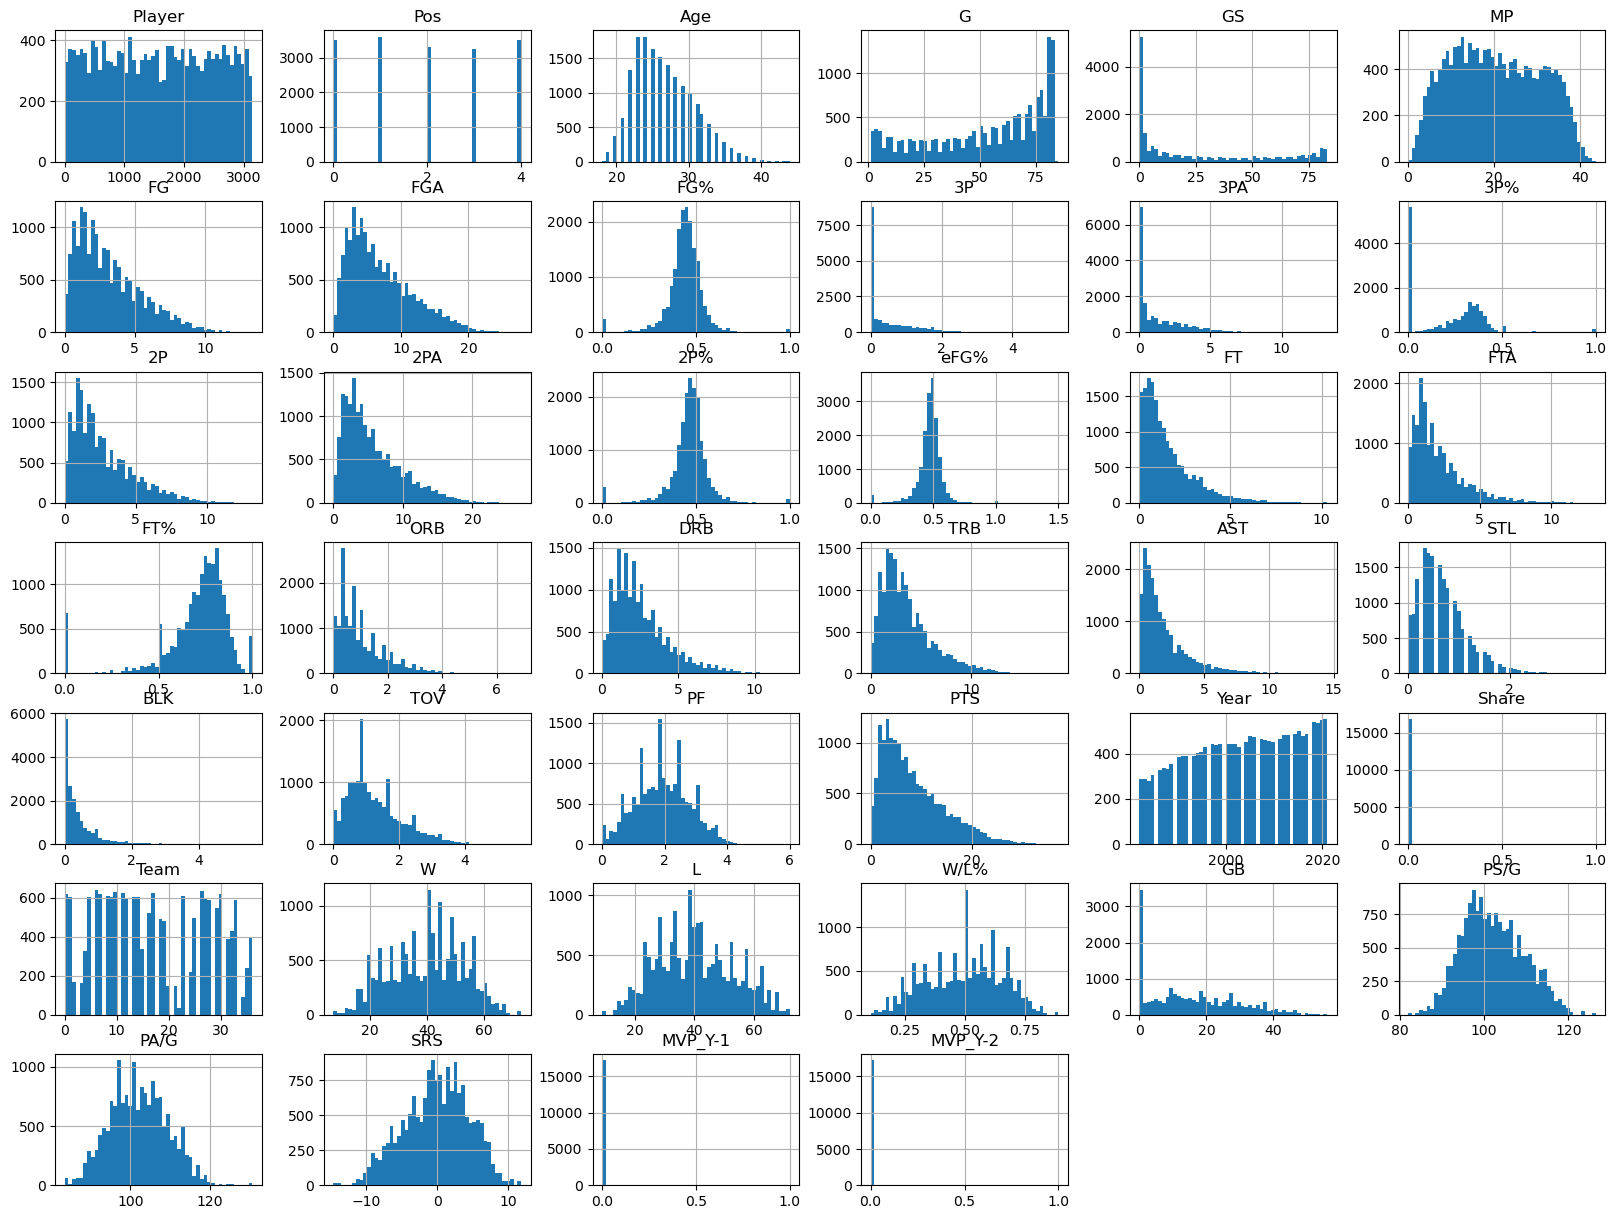

In [17]:
for column in DF.select_dtypes(include=['object']).columns:
    DF[column].value_counts().plot(kind='bar')
    plt.show()

#affiche les histogrammes pour les variables numériques
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
DF.corr()[DF.corr()>0.5]

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-2
Player,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,1.000000,0.617483,0.645816,0.548329,0.526924,NaN,NaN,NaN,NaN,0.524156,0.512811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548648,0.536609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GS,NaN,NaN,NaN,0.617483,1.000000,0.830042,0.758085,0.740525,NaN,NaN,NaN,NaN,0.731652,0.725152,NaN,NaN,0.645822,0.648837,NaN,NaN,0.659019,0.635763,0.549891,0.618034,NaN,0.690346,0.595468,0.748333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MP,NaN,NaN,NaN,0.645816,0.830042,1.000000,0.893386,0.898336,NaN,NaN,NaN,NaN,0.832176,0.838690,NaN,NaN,0.767175,0.765208,NaN,0.511629,0.732277,0.693797,0.661957,0.749645,NaN,0.820893,0.707728,0.893678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FG,NaN,NaN,NaN,0.548329,0.758085,0.893386,1.000000,0.982298,NaN,NaN,NaN,NaN,0.959783,0.951828,NaN,NaN,0.855900,0.849209,NaN,NaN,0.679008,0.645709,0.607436,0.671882,NaN,0.832085,0.601983,0.989725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FGA,NaN,NaN,NaN,0.526924,0.740525,0.898336,0.982298,1.000000,NaN,NaN,NaN,NaN,0.916014,0.934020,NaN,NaN,0.843502,0.826412,NaN,NaN,0.630745,0.585223,0.640529,0.692911,NaN,0.836526,0.569294,0.982246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FG%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.878290,0.922069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.984633,0.568311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
DF_corr = DF.corr()
columns = DF.columns
correlated_vars = []
for var1 in columns:
    for var2 in columns:
        if(var1 != var2 and DF_corr[var1][var2]>0.5):
            if([var1,var2] in correlated_vars  or [var2,var1] in correlated_vars):
                pass
            else: 
                correlated_vars.append([var1,var2])


In [ ]:
correlated_vars

In [ ]:
corr = DF.corr(method = "pearson")["Share"]
corr

In [ ]:
abs_corr = abs(corr)
abs_corr.sort_values()

Contrairement à ce que l'on pourrait penser, être MVP l'année précédente et dans une moindre mesure deux avant semble augmenter nos chances d'être MVP

Toutes nos variables sont maintenant numériques. Il faut maintenant réfléchir à quel type de modèle serait le plus pertinent dans notre cas.

La variable "Share" étant une variable prenant des valeurs sur tout l'intervalle [0,1], il sera plus judicieux ici de se tourner vers une régression.

In [ ]:
years =  sorted(DF["Year"].unique())
years

Nous allons utiliser les résultats des années allant de 1982 à 2015 pour prédire les MVPS des années 2016 à 2021

Commençons par l'année 2016

On définit l'ensemble d'apprentissage et de test ainsi que la variable cible.

In [ ]:
train = DF[DF["Year"]<2016]
test = DF[DF["Year"]==2019]
x_columns =  train.drop('Share', axis=1).columns
y_column  = 'Share'


Entrainement et utilisation du modèle

In [ ]:
reg = LinearRegression().fit(train[x_columns], train[y_column])
Y_pred_MVP_2016 = reg.predict(test[x_columns])

Un peu de mise en forme...

In [ ]:
Y_pred_MVP_2016 = pd.DataFrame(Y_pred_MVP_2016,columns = ["Pred_Share"],index = test.index)  #on associe à notre dataframe les index de l'ensemble de test pour pouvoir faire correspondre chaque prédiction au joueur correspondant.
Y_pred_MVP_2016

Relions ces prédictions aux noms des joueurs concernés à l'aide de l'index des lignes

In [ ]:
DF_pred = pd.concat([FinalStat["Player"],Y_pred_MVP_2016],axis = 1,join="inner")
DF_pred      

Trions ce dataframe pour avoir le classement prédit

In [ ]:
DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)

Maintenant que les lignes sont triées, on peut créer une colonne "Rank_pred" qui correspond à la position du joueur pour le MVP

In [ ]:
DF_pred["Rank_pred"] = 0
for i in range(len(DF_pred)):
    DF_pred["Rank_pred"].iloc[i] = i+1

In [ ]:
DF_pred

Pour comparer ces résultats aux vrais résultats, on va créer un Dataframe équivalent mais pour les valeurs réelles 

In [ ]:
DF_reel = pd.DataFrame(test[y_column])
DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)

In [ ]:
DF_reel["Rank_reel"] = 0
for i in range(len(DF_reel)):
    DF_reel["Rank_reel"].iloc[i] = i+1
DF_reel


On drop la colonne Share pour éviter le doublon après la jointure avec le DF_pred

In [ ]:
DF_reel.drop(columns = ["Share"], inplace = True)

In [ ]:
DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
DF_pred

Rassemblons tout cela dans un seul dataframe DF_2016

In [ ]:
DF_2016 = pd.concat([DF_pred,DF_reel], axis  = 1 )
DF_2016.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
DF_2016.head(13)

On constate que l'on prédit correctement le MVP de 2016, maintenant il faudrait trouver une métrique pertinente pour évaluer l'écart entre la position réelle du top 3 (ou 5) avec leur position prédite

In [14]:
def error_rank_mvp(df):
    #DF : Dataframe contenant au minimum la variable "Share"  ainsi que 
    #le classement réel et le classement prédit "Rank_pred", "Rank_reel"
    #On trie le Dataframe sur le classement réel
    df.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    #La variable i va contenir la position du dernier convoqué au MVP.
    #De cette manière en parcourant le Dataframe du début jusqu'à la position i, 
    #nous aurons tous les convoqués au MVP
    i= 0
    while df["Share"].iloc[i] > 0:
        i +=1
    print("Nombre de convoqués MVP : {}".format(i))
    rmse = (np.abs(df["Rank_reel"][:i]-df["Rank_pred"][:i]))**2
    rmse = rmse.sum()/i
    rmse = np.sqrt(rmse)
    
    return(rmse)

    
    

In [ ]:
error_rank_mvp(DF_2016)

Généralisons maintenant cette fonction de sorte à calculer cette erreur pour chaque année puis faire la moyenne

In [ ]:
#def pred_to_df(Y_pred):
    

In [ ]:
def cross_validation(DF,model):
    #DF : Dataframe comportant toutes les données exploitables pour l'apprentissage
    #model : Type du modèle que l'on va entrainer pour la prédiction du MVP
    years =  sorted(DF["Year"].unique())
    x_columns =  DF.drop('Share', axis=1).columns
    y_column  = 'Share'
    global_error = 0
    N = len(years)
    for year in years:
        #Construction ensemble apprentissage/test
        train =  DF[DF["Year"] != year]
        test =   DF[DF["Year"] == year]
        #Entrainement du modèle
        model.fit(train[x_columns], train[y_column])
        #Prédiction
        Y_pred_MVP = model.predict(test[x_columns])
        #Création du Dataframe comportant le classement réel et le classement prédit
        Y_pred_MVP = pd.DataFrame(Y_pred_MVP,columns = ["Pred_Share"],index = test.index)
        DF_pred = pd.concat([DF["Player"],Y_pred_MVP],axis = 1,join="inner")
        DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)
        DF_pred["Rank_pred"] = 0
        for i in range(len(DF_pred)):
            DF_pred["Rank_pred"].iloc[i] = i+1
        DF_reel = pd.DataFrame(test[y_column])
        DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
        DF_reel["Rank_reel"] = 0
        for j in range(len(DF_reel)):
            DF_reel["Rank_reel"].iloc[j] = j+1
        DF_reel.drop(columns = ["Share"], inplace = True)
        DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
        DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
        DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
        #Calcul de l'erreur de prédiction
        year_error = error_rank_mvp(DF_year)
        print("Année TEST : {}".format(year)+" ERROR RANK: {}\n".format(year_error))
        global_error = global_error + year_error
        
    print("ERREUR GLOBALE MOYENNE : {}".format(global_error/N))
    
    return(global_error/N)
    
    

In [ ]:
reg = LinearRegression()
cross_validation(DF,reg)

In [ ]:
rf = RandomForestRegressor()
cross_validation(DF,rf)

In [ ]:
en = ElasticNet(alpha= 0.1, fit_intercept= True, l1_ratio= 0, max_iter= 500)
cross_validation(DF,en)

In [ ]:
rf2 = RandomForestRegressor(bootstrap = True, max_features = 'auto', n_estimators = 500)
cross_validation(DF,rf2)

In [ ]:
def RMSE_Tot(model,para_grids):
    
    rmse_tot = 0
    #Prendre plusieurs année
    #for i in range(diff_annee):
    train = DF[DF["Year"] < 2016]
    test = DF[DF["Year"] >= 2016]
    x_columns =  train.drop('Share', axis=1).columns
    y_column  = 'Share'
    reg = model().fit(train[x_columns], train[y_column])
    grid = GridSearchCV(reg, para_grids)
    grid.fit(train[x_columns],train[y_column])
    reg_grid = grid.best_estimator_
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print(grid.best_score_, grid.best_params_)
    bestpm = grid.best_params_
    bestpara = bestpm
    Y_pred_MVP = reg_grid.predict(test[x_columns])
    Y_pred_MVP = pd.DataFrame(Y_pred_MVP,columns = ["Pred_Share"],index = test.index)  #on associe à notre dataframe les index de l'ensemble de test pour pouvoir faire correspondre chaque prédiction au joueur correspondant.
    DF_pred = pd.concat([FinalStat["Player"],Y_pred_MVP],axis = 1,join="inner")
    DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)
    DF_pred["Rank_pred"] = 0
    for i in range(len(DF_pred)):
        DF_pred["Rank_pred"].iloc[i] = i+1
    DF_reel = pd.DataFrame(test[y_column])
    DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
    DF_reel["Rank_reel"] = 0
    for i in range(len(DF_reel)):
        DF_reel["Rank_reel"].iloc[i] = i+1
    DF_reel.drop(columns = ["Share"], inplace = True)
    DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
    DF_2016 = pd.concat([DF_pred,DF_reel], axis  = 1 )
    DF_2016.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    i = 0
    while DF_2016["Share"].iloc[i] > 0:
        i +=1

    rmse = (np.abs(DF_2016["Rank_reel"][:i]-DF_2016["Rank_pred"][:i]))**2
    rmse = rmse.sum()
    rmse = np.sqrt(rmse)
    rmse_tot += rmse/i
    return(rmse_tot/6)
    

In [ ]:
para_grids_elasticNET = {
    'l1_ratio' : [0,0.1],
    'alpha' : [0,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'fit_intercept' : [True, False],
    'max_iter' : [100, 500, 1000, 1500]
}

In [ ]:
para_grids_randomForest = {
    "random_state" : [42],
    "n_estimators" : [10,50,100,200,500],
    "max_features" : ["auto","log2","sqrt"],
    "bootstrap" : [True, False]
    }

In [ ]:
#rmse_tot = RMSE_Tot(ElasticNet,para_grids_elasticNET)

In [ ]:
#rmse_tot #ElasticNET

In [ ]:
#rmse_tot = RMSE_Tot(RandomForestRegressor,para_grids_randomForest)

In [ ]:
#rmse_tot #RandomForest

In [ ]:
# 0.6444892841540494 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 42}

## H2O

In [47]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]!=2021]
test = HF[HF["Year"]==2021]
x = train.columns
y = "Share"
x.remove(y)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,19 mins 58 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"2 years, 7 months and 11 days !!!"
H2O_cluster_name:,H2O_from_python_CYTech_Student_98s3ui
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.368 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


OSError: [Errno 28] No space left on device

In [36]:
preds = aml.predict(test)


stackedensemble prediction progress: |████████████████████████████████████| 100%


In [40]:
test = DF[DF["Year"]==2021]

In [41]:
Y_pred_MVP = pd.DataFrame(preds.as_data_frame(),columns = ["Pred_Share"],index = test.index)
DF_pred = pd.concat([DF["Player"],Y_pred_MVP],axis = 1,join="inner")
DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)
DF_pred["Rank_pred"] = 0
for i in range(len(DF_pred)):
    DF_pred["Rank_pred"].iloc[i] = i+1
DF_reel = pd.DataFrame(test[y])
DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
DF_reel["Rank_reel"] = 0
for j in range(len(DF_reel)):
    DF_reel["Rank_reel"].iloc[j] = j+1
DF_reel.drop(columns = ["Share"], inplace = True)
DF_pred = pd.concat([DF_pred,test[y]],axis = 1,join="inner")
DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
error_rank_mvp(DF_year)

Nombre de convoqués MVP : 16


248.0784906032766

In [46]:
DF_year[["Rank_pred","Rank_reel"]].head(10)

,Rank_pred,Rank_reel
720,12,1
10096,326,2
4205,145,3
11591,363,4
1518,60,5
13505,400,6
8891,267,7
4107,119,8
4102,114,9
13887,440,10
